## 4. Bibliotecas de mercado financeiro

Nesta seção vamos ver as seguintes bibliotecas

1. yfinance
2. yahoo_fin
3. pandas_datareader
4. investpy

## 4.1 Biblioteca yfinance

Por que utilizar a biblioteca yfinance? É uma das formas mais fáceis de se obter dados de mercado financeiro. Ela é estável e
extrai os dados diretamente do Yahoo Finance

Além disso, possui uma ampla gama de dados disponíveis que podemos obter para um determinado papel

### 4.1.1. Instalação

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd

### 4.1.2. Cotações de papéis

É possível obter dados de uma ampla variedade de papéis: ações, Flls, ETFs, BDRs, etc.

Essa é a estrutura básica que precisamos repetir quando quisemos obter dados de cotações

[*********************100%***********************]  1 of 1 completed


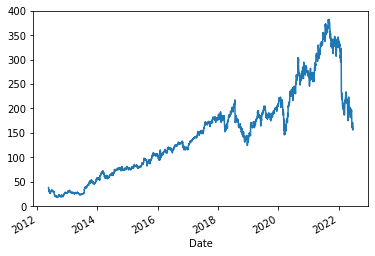

In [3]:
yf.download('FB').Close.plot()

In [4]:
data = yf.download('AAPL', start ='2017-01-01', end = '2022-05-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.257648,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.227139,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.365595,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.670677,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.924122,134247600


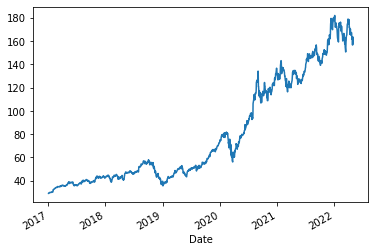

In [6]:
data.Close.plot();

### 4.1.3 Outros dados sobre os papéis

Passando o ticker dentro da função

In [7]:
coke = yf.Ticker('KO')

In [8]:
# informações do papel

coke.info

{'zip': '30313',
 'sector': 'Consumer Defensive',
 'fullTimeEmployees': 79000,
 'longBusinessSummary': 'The Coca-Cola Company, a beverage company, manufactures, markets, and sells various nonalcoholic beverages worldwide. The company provides sparkling soft drinks; flavored and enhanced water, and sports drinks; juice, dairy, and plant\x96based beverages; tea and coffee; and energy drinks. It also offers beverage concentrates and syrups, as well as fountain syrups to fountain retailers, such as restaurants and convenience stores. The company sells its products under the Coca-Cola, Diet Coke/Coca-Cola Light, Coca-Cola Zero Sugar, Fanta, Fresca, Schweppes, Sprite, Thums Up, Aquarius, Ciel, dogadan, Dasani, glacéau smartwater, glacéau vitaminwater, Ice Dew, I LOHAS, Powerade, Topo Chico, AdeS, Del Valle, fairlife, innocent, Minute Maid, Minute Maid Pulpy, Simply, Ayataka, BODYARMOR, Costa, FUZE TEA, Georgia, and Gold Peak brands. It operates through a network of independent bottling partn

In [9]:
# histórico do papel 

hist = coke.history(period = 'max')

In [10]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02,0.050381,0.051752,0.050381,0.050381,806400,0.0,0.0
1962-01-03,0.049632,0.049632,0.048510,0.049258,1574400,0.0,0.0
1962-01-04,0.049383,0.050006,0.049383,0.049632,844800,0.0,0.0
1962-01-05,0.049632,0.050256,0.048385,0.048510,1420800,0.0,0.0
1962-01-08,0.048136,0.048136,0.047076,0.048011,2035200,0.0,0.0


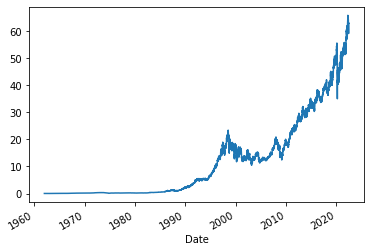

In [11]:
hist.Close.plot();

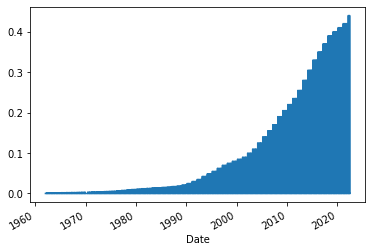

In [12]:
hist.Dividends.plot()

In [13]:
hist.shape

(15226, 7)

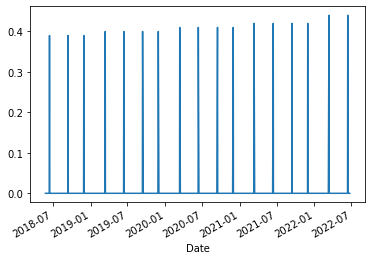

In [14]:
hist.Dividends.iloc[14197:15225].plot()

In [15]:
# Mostrar evenos de liquidez actions ( dividendos, splits)
coke.actions

,Dividends,Stock Splits
Date,,
1962-03-13,0.001563,0.0
1962-06-11,0.001563,0.0
1962-09-11,0.001563,0.0
1962-11-28,0.001563,0.0
1963-03-11,0.001758,0.0
...,...,...
2021-06-14,0.420000,0.0
2021-09-14,0.420000,0.0
2021-11-30,0.420000,0.0


In [16]:
coke.dividends

Date
1962-03-13    0.001563
1962-06-11    0.001563
1962-09-11    0.001563
1962-11-28    0.001563
1963-03-11    0.001758
                ...   
2021-06-14    0.420000
2021-09-14    0.420000
2021-11-30    0.420000
2022-03-14    0.440000
2022-06-14    0.440000
Name: Dividends, Length: 241, dtype: float64

In [17]:
# Mostrar demonstrativos financeiros

coke.financials

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,12425000000.0,9749000000.0,10786000000.0,8225000000.0
Minority Interest,1861000000.0,1985000000.0,2117000000.0,2077000000.0
Net Income,9771000000.0,7747000000.0,8920000000.0,6434000000.0
Selling General Administrative,11984000000.0,9579000000.0,12011000000.0,11013000000.0
Gross Profit,23298000000.0,19581000000.0,22647000000.0,21233000000.0
Ebit,11321000000.0,9990000000.0,10625000000.0,10203000000.0
Operating Income,11321000000.0,9990000000.0,10625000000.0,10203000000.0
Other Operating Expenses,-7000000.0,12000000.0,11000000.0,17000000.0


In [18]:
# demonstrativos por trimestres

coke.quarterly_financials

,2022-04-01,2021-12-31,2021-10-01,2021-07-02
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,3458000000.0,2960000000.0,3084000000.0,3618000000.0
Minority Interest,1996000000.0,1861000000.0,1954000000.0,2006000000.0
Net Income,2781000000.0,2414000000.0,2471000000.0,2641000000.0
Selling General Administrative,2897000000.0,3382000000.0,3049000000.0,2944000000.0
Gross Profit,6400000000.0,5376000000.0,6065000000.0,6342000000.0
Ebit,3503000000.0,2001000000.0,3016000000.0,3398000000.0
Operating Income,3503000000.0,2001000000.0,3016000000.0,3398000000.0
Other Operating Expenses,NaN,-7000000.0,-7000000.0,-7000000.0


In [19]:
# principais acionistas da empresa

coke.major_holders

,0,1
0,0.66%,% of Shares Held by All Insider
1,70.75%,% of Shares Held by Institutions
2,71.22%,% of Float Held by Institutions
3,3462,Number of Institutions Holding Shares


In [20]:
# Acionistas Institucionais

coke.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Berkshire Hathaway, Inc",400000000,2022-03-30,0.0923,24800000000
1,"Vanguard Group, Inc. (The)",351220018,2022-03-30,0.0810,21775641116
2,Blackrock Inc.,279114132,2022-03-30,0.0644,17305076184
3,State Street Corporation,171972013,2022-03-30,0.0397,10662264806
4,"FMR, LLC",83088402,2022-03-30,0.0192,5151480924
5,"Wellington Management Group, LLP",80654038,2022-03-30,0.0186,5000550356
6,"Geode Capital Management, LLC",70444447,2022-03-30,0.0163,4367555714
7,JP Morgan Chase & Company,70822837,2022-03-30,0.0163,4391015894
8,"Charles Schwab Investment Management, Inc.",51570921,2022-03-30,0.0119,3197397102
9,Morgan Stanley,51062192,2022-03-30,0.0118,3165855904


In [21]:
# Mostrar balanço

coke.balance_sheet

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Intangible Assets,1.525000e+10,1.104400e+10,1.000200e+10,7.478000e+09
Capital Surplus,1.811600e+10,1.760100e+10,1.715400e+10,1.652000e+10
Total Liab,6.949400e+10,6.601200e+10,6.528300e+10,6.415800e+10
Total Stockholder Equity,2.299900e+10,1.929900e+10,1.898100e+10,1.698100e+10
Minority Interest,1.861000e+09,1.985000e+09,2.117000e+09,2.077000e+09
Other Current Liab,1.859000e+09,2.010000e+09,1.636000e+09,5.980000e+08
Total Assets,9.435400e+10,8.729600e+10,8.638100e+10,8.321600e+10
Common Stock,1.760000e+09,1.760000e+09,1.760000e+09,1.760000e+09
Other Current Assets,1.018000e+09,1.520000e+08,5.700000e+07,1.130000e+08
Retained Earnings,6.909400e+10,6.655500e+10,6.585500e+10,6.323400e+10


In [22]:
# balanço trimestral

coke.quarterly_balance_sheet

,2022-04-01,2021-12-31,2021-10-01,2021-07-02
Intangible Assets,1.514200e+10,1.525000e+10,1.094500e+10,1.121300e+10
Capital Surplus,1.838800e+10,1.811600e+10,1.792900e+10,1.778100e+10
Total Liab,6.722300e+10,6.949400e+10,6.647300e+10,6.593900e+10
Total Stockholder Equity,2.484500e+10,2.299900e+10,2.217900e+10,2.224900e+10
Minority Interest,1.996000e+09,1.861000e+09,1.954000e+09,2.006000e+09
Other Current Liab,9.740000e+08,1.859000e+09,9.240000e+08,1.037000e+09
Total Assets,9.406400e+10,9.435400e+10,9.060600e+10,9.019400e+10
Common Stock,1.760000e+09,1.760000e+09,1.760000e+09,1.760000e+09
Other Current Assets,1.261000e+09,1.018000e+09,2.660000e+08,3.060000e+08
Retained Earnings,6.996900e+10,6.909400e+10,6.849400e+10,6.783800e+10


In [23]:
# Fluxo de caixa

coke.cashflow

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Investments,1.029000e+09,2.520000e+08,2.269000e+09,7.188000e+09
Change To Liabilities,2.843000e+09,-8.600000e+08,1.318000e+09,-2.510000e+08
Total Cashflows From Investing Activities,-2.765000e+09,-1.477000e+09,-3.976000e+09,5.927000e+09
Net Borrowings,2.280000e+08,-1.862000e+09,-1.841000e+09,-2.995000e+09
Total Cash From Financing Activities,-6.786000e+09,-8.070000e+09,-9.004000e+09,-1.034700e+10
Change To Operating Activities,-5.920000e+08,5.850000e+08,-7.070000e+08,-7.960000e+08
Issuance Of Stock,7.020000e+08,6.470000e+08,1.012000e+09,1.476000e+09
Net Income,9.771000e+09,7.747000e+09,8.920000e+09,6.434000e+09
Change In Cash,2.915000e+09,3.730000e+08,-2.581000e+09,2.945000e+09
Repurchase Of Stock,-1.110000e+08,-1.180000e+08,-1.103000e+09,-1.912000e+09


In [24]:
# Fluxo de caixa trimestral

coke.quarterly_cashflow

,2022-04-01,2021-12-31,2021-10-01,2021-07-02
Investments,4.880000e+08,-1.405000e+09,3.160000e+08,2.209000e+09
Change To Liabilities,0.000000e+00,2.843000e+09,0.000000e+00,0.000000e+00
Total Cashflows From Investing Activities,1.460000e+08,-4.684000e+09,1.660000e+08,2.034000e+09
Net Borrowings,7.000000e+06,1.417000e+09,1.600000e+07,-3.749000e+09
Total Cash From Financing Activities,-2.975000e+09,-1.950000e+08,-1.629000e+09,-5.326000e+09
Change To Operating Activities,-2.468000e+09,-7.600000e+08,6.060000e+08,9.390000e+08
Issuance Of Stock,4.490000e+08,2.090000e+08,1.510000e+08,1.590000e+08
Net Income,2.781000e+09,2.414000e+09,2.471000e+09,2.641000e+09
Change In Cash,-2.033000e+09,-1.588000e+09,2.105000e+09,6.970000e+08
Repurchase Of Stock,-5.460000e+08,-7.000000e+06,-7.000000e+06,-7.000000e+06


In [25]:
# Ganhos da empresa

coke.earnings

,Revenue,Earnings
Year,,
2018,34300000000,6434000000
2019,37266000000,8920000000
2020,33014000000,7747000000
2021,38655000000,9771000000


In [26]:
# Ganhos Trimestrais

coke.quarterly_earnings

,Revenue,Earnings
Quarter,,
3Q2021,10129000000,2641000000
4Q2021,10042000000,2471000000
4Q2021,9464000000,2414000000
2Q2022,10491000000,2781000000


In [27]:
# Mostrar calendário de eventos

coke.calendar

,0,1
Earnings Date,2022-07-19 12:30:00,2022-07-25 12:30:00
Earnings Average,0.67,0.67
Earnings Low,0.61,0.61
Earnings High,0.74,0.74
Revenue Average,10554000000,10554000000
Revenue Low,9171000000,9171000000
Revenue High,11104000000,11104000000


Exemplo com papéis brasileiros

In [28]:
bdr_apple = yf.download('AAPL34.SA',start = '2017-01-01', end = '2022-05-01')

[*********************100%***********************]  1 of 1 completed


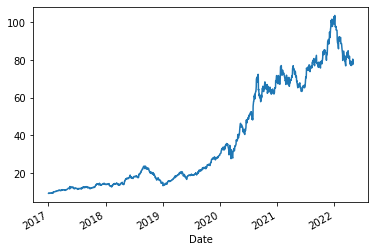

In [29]:
bdr_apple.Close.plot()

In [30]:
ivvb11 = yf.download('IVVB11.SA',start = '2017-01-01', end = '2022-05-01')

[*********************100%***********************]  1 of 1 completed


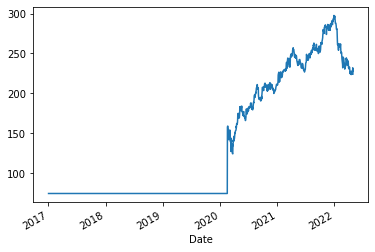

In [31]:
ivvb11.Close.plot()

In [32]:
petro = yf.download('PETR4.SA',start = '2017-01-01', end = '2022-05-01')

[*********************100%***********************]  1 of 1 completed


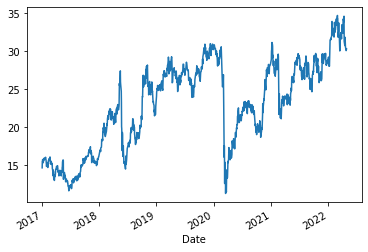

In [33]:
petro.Close.plot()

## 4.2. Biblioteca yahoo_fin

A biblioteca yahoo_fin tem uma característica interessante: ela permite obter os dados em quase tempo real. Possui apenas um pequeno atraso de 15 min,
mas são dados do intraday, o que já representam uma grande vantagem.

In [34]:
!pip install requests_html
!pip install yahoo_fin

In [35]:
# Importar módulo de stock_info dentro da biblioteca yahoo_fin
from yahoo_fin import stock_info as si

In [36]:
# verificando o preço do papel 'aaple'
si.get_live_price('aapl')

141.98660278320312

In [37]:
si.get_live_price('ETH-USD')

1191.9359130859375

In [38]:
si.get_live_price('PETR4.SA')

26.979999542236328

Criando uma pequena estrutura para extrair os dados continuamente ao vivo

In [39]:
import time

time.time()

1656338090.5540287

In [40]:
# a cada 15 minutos, após esse tempo ele vai ser encerrado 

t_end = time.time() + 60*15

In [41]:
df = pd.DataFrame(columns = ['DateTime','Quote'])

a = 0

while time.time() < t_end:
    
    x= si.get_live_price('PETR4.SA')
    
    d = {'DateTime': a, 'Quote': round(x,2)}
    print(d)
    # criando dataframe
    linha = pd.DataFrame(data = d, index =[a])
    
    a += 1
    
    # concatenação 
    
    df =  pd.concat([df, linha], ignore_index = True) 
    
    # parametro para não recetar o index - ignore_index = True
    
    #  pausa de 2 segundos
    
    time.sleep(2)

{'DateTime': 0, 'Quote': 26.97}
{'DateTime': 1, 'Quote': 26.99}
{'DateTime': 2, 'Quote': 27.0}
{'DateTime': 3, 'Quote': 26.98}
{'DateTime': 4, 'Quote': 26.99}
{'DateTime': 5, 'Quote': 26.99}
{'DateTime': 6, 'Quote': 26.99}
{'DateTime': 7, 'Quote': 26.99}
{'DateTime': 8, 'Quote': 26.99}
{'DateTime': 9, 'Quote': 26.99}
{'DateTime': 10, 'Quote': 26.98}
{'DateTime': 11, 'Quote': 27.0}
{'DateTime': 12, 'Quote': 27.0}
{'DateTime': 13, 'Quote': 27.01}
{'DateTime': 14, 'Quote': 27.01}
{'DateTime': 15, 'Quote': 27.01}
{'DateTime': 16, 'Quote': 27.02}
{'DateTime': 17, 'Quote': 27.02}
{'DateTime': 18, 'Quote': 27.03}
{'DateTime': 19, 'Quote': 27.02}
{'DateTime': 20, 'Quote': 27.01}
{'DateTime': 21, 'Quote': 27.01}
{'DateTime': 22, 'Quote': 27.01}
{'DateTime': 23, 'Quote': 27.03}
{'DateTime': 24, 'Quote': 27.05}
{'DateTime': 25, 'Quote': 27.04}
{'DateTime': 26, 'Quote': 27.05}
{'DateTime': 27, 'Quote': 27.04}
{'DateTime': 28, 'Quote': 27.03}
{'DateTime': 29, 'Quote': 27.03}
{'DateTime': 30, 'Quote

{'DateTime': 245, 'Quote': 27.11}
{'DateTime': 246, 'Quote': 27.11}
{'DateTime': 247, 'Quote': 27.11}
{'DateTime': 248, 'Quote': 27.11}
{'DateTime': 249, 'Quote': 27.12}
{'DateTime': 250, 'Quote': 27.13}
{'DateTime': 251, 'Quote': 27.12}
{'DateTime': 252, 'Quote': 27.11}
{'DateTime': 253, 'Quote': 27.12}
{'DateTime': 254, 'Quote': 27.14}
{'DateTime': 255, 'Quote': 27.12}
{'DateTime': 256, 'Quote': 27.13}
{'DateTime': 257, 'Quote': 27.14}
{'DateTime': 258, 'Quote': 27.13}
{'DateTime': 259, 'Quote': 27.14}
{'DateTime': 260, 'Quote': 27.13}
{'DateTime': 261, 'Quote': 27.13}
{'DateTime': 262, 'Quote': 27.13}
{'DateTime': 263, 'Quote': 27.13}
{'DateTime': 264, 'Quote': 27.12}
{'DateTime': 265, 'Quote': 27.12}
{'DateTime': 266, 'Quote': 27.14}
{'DateTime': 267, 'Quote': 27.13}
{'DateTime': 268, 'Quote': 27.12}
{'DateTime': 269, 'Quote': 27.13}
{'DateTime': 270, 'Quote': 27.13}
{'DateTime': 271, 'Quote': 27.12}
{'DateTime': 272, 'Quote': 27.11}
{'DateTime': 273, 'Quote': 27.1}
{'DateTime': 27

In [42]:
df.head()

,DateTime,Quote
0,0,26.97
1,1,26.99
2,2,27.00
3,3,26.98
4,4,26.99


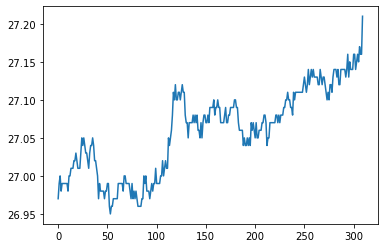

In [43]:
df.Quote.plot()

In [44]:
# módulo datetime utilizando 

In [45]:
from datetime  import datetime

In [46]:
agora = datetime.now()

In [47]:
agora.strftime('%d-%b-%Y %H:%M:%S')

'27-Jun-2022 11:09:53'

In [48]:
# fazendo uma variação de 5 minutos

t_end = time.time() + 60*5

df = pd.DataFrame(columns = ['DateTime','Quote'])

a = 0

while time.time() < t_end:
    
    x= si.get_live_price('PETR4.SA')
    
    dateTimeObj = datetime.now()
    timestampStr = dateTimeObj.strftime('%d-%b-%Y %H:%M:%S')
    
    d = {'DateTime': timestampStr, 'Quote': round(x,2)}
    
    # criando dataframe
    linha = pd.DataFrame(data = d, index =[a])
    
    a += 1
    
    # concatenação 
    
    df =  pd.concat([df, linha], ignore_index = True) 
    
    # parametro para não recetar o index - ignore_index = True
    
    #  pausa de 1 segundos
    
    time.sleep(1)

In [49]:
df.head()

,DateTime,Quote
0,27-Jun-2022 11:09:55,27.21
1,27-Jun-2022 11:09:57,27.21
2,27-Jun-2022 11:09:58,27.20
3,27-Jun-2022 11:10:01,27.20
4,27-Jun-2022 11:10:02,27.20


In [50]:
df.index = df.DateTime

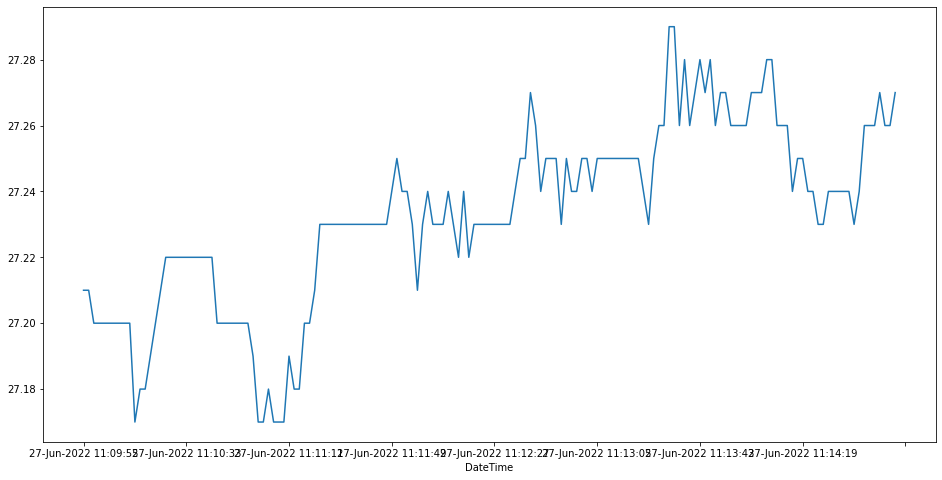

In [51]:
df.Quote.plot(figsize = (16,8))

Vamos ver agora mais uma biblioteca que extrai dados do Yahoo Finance

## 4.3 Biblioteca pandas_datareader

In [63]:
!pip install pandas_datareader 
import pandas_datareader as pdr

In [64]:
import pandas as pd



In [65]:
dados = pdr.data.get_data_yahoo('WEGE3.SA', start = '2019-01-01')

In [66]:
dados.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,9.090,8.75,8.810,8.990,4751200.0,8.597388
2019-01-03,9.195,8.85,9.000,9.195,8316400.0,8.793438
2019-01-04,9.340,9.00,9.200,9.300,8340200.0,8.893848
2019-01-07,9.380,9.10,9.375,9.155,5860200.0,8.755180
2019-01-08,9.215,9.02,9.185,9.080,6306800.0,8.683457


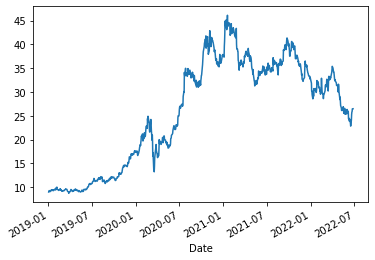

In [68]:
dados.Close.plot()

In [69]:
locaweb= pdr.data.get_data_yahoo('LWSA3.SA', start ='2019-01-01')

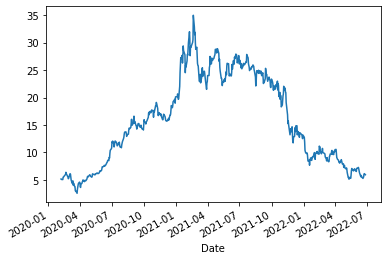

In [70]:
locaweb.Close.plot()

In [72]:
acoes = ['PETR4.SA', 'WEGE3.SA', 'MGLU3.SA', 'LREN3.SA', 'VALE3.SA', 'BPAC11.SA']

In [74]:
inicio = '2020-01-01'

precos_acoes = pd.DataFrame()

for acao in acoes :
    precos_acoes[acao] = pdr.data.get_data_yahoo(acao , start = inicio) ['Adj Close']

In [75]:
precos_acoes.head()

,PETR4.SA,WEGE3.SA,MGLU3.SA,LREN3.SA,VALE3.SA,BPAC11.SA
Date,,,,,,
2020-01-02,20.466219,17.114557,12.029735,54.897701,42.689384,18.235775
2020-01-03,20.299559,16.896009,11.922435,54.515804,42.375088,18.288694
2020-01-06,20.539551,16.939720,11.932189,54.468075,42.123650,18.262236
2020-01-07,20.459555,17.070845,11.898049,54.439423,42.430096,18.335094
2020-01-08,20.332890,16.424925,12.263843,54.792683,42.437950,18.172600


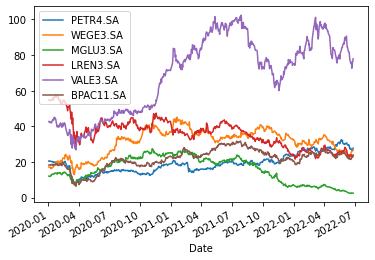

In [76]:
precos_acoes.plot()

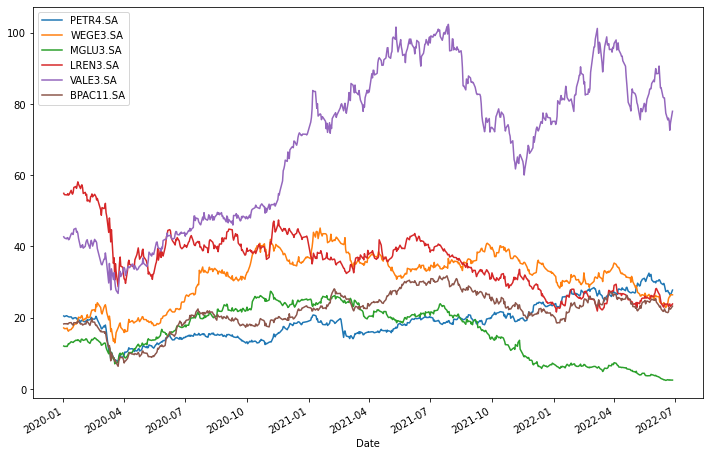

In [77]:
precos_acoes.plot(figsize =(12,8))

## 4.4 Biblioteca investpy

A biblioteca investy é uma das fontes mais versáteis de dados de mercado financeiro.

Diferente das bibliotecas anteriores, que se baseavam no Yahoo Finance para extrair os eventos, esta biblioteca faz a extração do site investing.com

Por causa disso, permite acesso a uma varidade ainda maior de tipos de ativos financeiros

### 4.4.1 Instalando e abrindo biblioteca

In [79]:
!pip install investpy

  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481577 sha256=8e1ad8f075f10653d0422a909d139dc4eb4474128019d0050f03424c39763f01
  Stored in directory: c:\users\jefferson luis\appdata\local\pip\cache\wheels\9a\6f\8e\21466569113166e5859029b97fcae2b81af57063ed9faf698e
Successfully built investpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.0 which is incompatible.


In [80]:
import investpy 
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

### 4.4.2. Ações 

A forma mais fácil de se obter dados de ações com a investpy é utilizando a função search_quotes

In [82]:
search_results =  investpy.search_quotes(text = 'PETRO', products = ['stocks'], countries = ['brazil'], n_results = 50)

In [88]:
for search_result in search_results[1:2]:
    print(search_result)

{"id_": 18750, "name": "Petroleo Brasileiro SA PN", "symbol": "PETR4", "country": "brazil", "tag": "/equities/petrobras-pn", "pair_type": "stocks", "exchange": "BM&FBovespa"}


In [85]:
search_results

In [92]:
petr = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date = '01/06/2021')

In [93]:
# OHLC: Open, High, Low,, Close
petr.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2014-01-02,15.49,15.54,15.04,15.13,17111300,-1.94
2014-01-03,15.12,15.16,14.83,14.83,17598400,-1.98
2014-01-06,14.86,15.03,14.60,15.01,20474600,1.21
2014-01-07,15.04,15.20,14.60,14.60,18785300,-2.73
2014-01-08,14.70,14.81,14.59,14.62,15558400,0.14


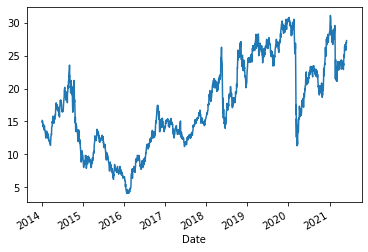

In [94]:
petr['Close'].plot()

In [97]:
# Fazendo consulta - magazine
# produto - ações
# 10 primeiros resultados

search_results =  investpy.search_quotes(text = 'magazine', products = ['stocks'], countries = ['brazil'], n_results = 10)

for search_result in search_results:
    print(search_result)

{"id_": 18729, "name": "Magazine Luiza SA", "symbol": "MGLU3", "country": "brazil", "tag": "/equities/magaz-luiza-on-nm", "pair_type": "stocks", "exchange": "BM&FBovespa"}


In [98]:
mglu = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date = '01/06/2021')

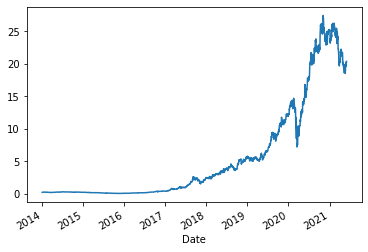

In [99]:
mglu['Close'].plot()

Vale ressaltar que há uma outra função na investpy específica para ações, que também poderia ter sido utilizada:
    
    investpy.stocks.get_stock_historical_data()

In [101]:
investpy.stocks.get_stock_historical_data('PETR4', 
                                          from_date = '01/01/2014', 
                                          to_date = '01/6/2021',
                                        country ='brazil')

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2014-01-02,15.49,15.54,15.04,15.13,17111300,BRL
2014-01-03,15.12,15.16,14.83,14.83,17598400,BRL
2014-01-06,14.86,15.03,14.60,15.01,20474600,BRL
2014-01-07,15.04,15.20,14.60,14.60,18785300,BRL
2014-01-08,14.70,14.81,14.59,14.62,15558400,BRL
...,...,...,...,...,...,...
2021-05-26,25.91,26.18,25.65,26.09,46252000,BRL
2021-05-27,26.08,26.25,25.77,25.91,48450100,BRL
2021-05-28,26.20,27.02,26.15,26.99,128991904,BRL


In [102]:
mglu = investpy.stocks.get_stock_historical_data('MGLU3', 
                                          from_date = '01/01/2014', 
                                          to_date = '01/6/2021',
                                        country ='brazil')

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2014-01-02,0.22,0.23,0.20,0.21,40896000,BRL
2014-01-03,0.21,0.22,0.20,0.22,25686400,BRL
2014-01-06,0.22,0.23,0.22,0.23,18982400,BRL
2014-01-07,0.23,0.24,0.23,0.23,39680000,BRL
2014-01-08,0.23,0.24,0.23,0.24,25273600,BRL
...,...,...,...,...,...,...
2021-05-26,20.36,20.39,19.65,19.67,19389100,BRL
2021-05-27,19.74,19.84,19.47,19.59,22358500,BRL
2021-05-28,19.70,20.42,19.62,20.25,19345400,BRL


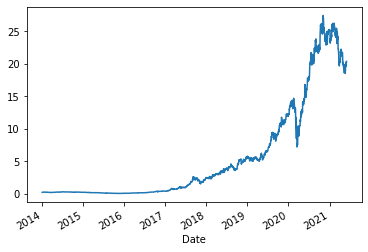

In [103]:
mglu.Close.plot()

### 4.4.3 Indices

Como obter informações de índices como IBOV e S&P 500

In [104]:
search_results =  investpy.search_quotes(text = 'bvsp',
                                         products = ['indices'],
                                         countries = ['brazil'],
                                         n_results = 150)

for search_result in search_results:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}
{"id_": 49632, "name": "Ibovespa USD", "symbol": "BVSPUSD", "country": "brazil", "tag": "/indices/ibovespa-usd", "pair_type": "indices", "exchange": "BM&FBovespa"}
{"id_": 49633, "name": "Ibovespa EUR", "symbol": "BVSPEUR", "country": "brazil", "tag": "/indices/ibovespa-eur", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [105]:
# limitar apenas o primeiro resultado

for search_result in search_results[:1]:
    print(search_result)

{"id_": 17920, "name": "Bovespa", "symbol": "BVSP", "country": "brazil", "tag": "/indices/bovespa", "pair_type": "indices", "exchange": "BM&FBovespa"}


In [106]:
ibov = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date = '01/06/2021')

In [107]:
ibov.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2014-01-02,51522.0,51656.0,50246.0,50341.0,3476344,-2.26
2014-01-03,50348.0,50981.0,50269.0,50981.0,7360435,1.27
2014-01-06,50980.0,51002.0,50451.0,50974.0,3727849,-0.01
2014-01-07,50982.0,51478.0,50429.0,50430.0,3339481,-1.07
2014-01-08,50431.0,50793.0,50424.0,50577.0,2916519,0.29


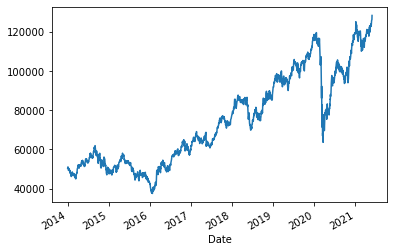

In [108]:
ibov['Close'].plot()

In [111]:
Ibov = investpy.indices.get_index_historical_data('bovespa',
                                                 from_date = '01/01/2014',
                                                 to_date = '01/06/2021',
                                                 country = 'brazil')

In [112]:
Ibov.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2014-01-02,51522.0,51656.0,50246.0,50341.0,3476344,BRL
2014-01-03,50348.0,50981.0,50269.0,50981.0,7360435,BRL
2014-01-06,50980.0,51002.0,50451.0,50974.0,3727849,BRL
2014-01-07,50982.0,51478.0,50429.0,50430.0,3339481,BRL
2014-01-08,50431.0,50793.0,50424.0,50577.0,2916519,BRL


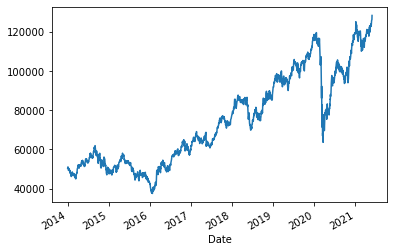

In [113]:
Ibov.Close.plot()

# 4.4.4 ETFs

In [116]:
# pesquisar no site para ver como é chamado o BOVA11

bova11 = investpy.get_etf_historical_data(etf = 'Ishares Ibovespa',
                                from_date = '01/01/2014',
                                to_date = '01/06/2021',
                                country = 'brazil')

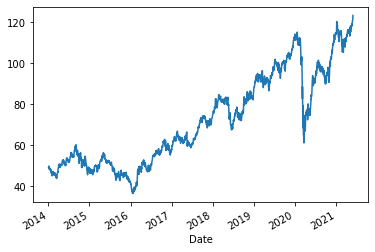

In [117]:
bova11['Close'].plot()

In [118]:
# pesquisa de ouro

gld = investpy.get_etf_historical_data(etf = 'SPDR Gold Shares',
                                from_date = '01/01/2014',
                                to_date = '01/06/2021',
                                country = 'united states')

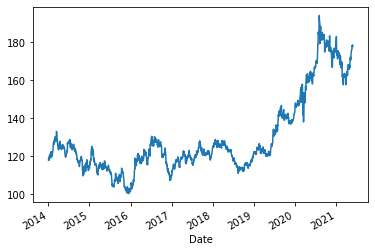

In [119]:
gld['Close'].plot()

In [120]:
# Pesquisando ETF ewz

search_results =  investpy.search_quotes(text = 'ewz',
                                         products = ['etfs'],
                                         countries = ['united states'],
                                         n_results = 50)

for search_result in search_results:
    print(search_result)

{"id_": 509, "name": "iShares MSCI Brazil ETF", "symbol": "EWZ", "country": "united states", "tag": "/etfs/ishares-brazil-index", "pair_type": "etfs", "exchange": "NYSE"}
{"id_": 38136, "name": "iShares MSCI Brazil Small-Cap ETF", "symbol": "EWZS", "country": "united states", "tag": "/etfs/ishares-msci-brazil-small-cap", "pair_type": "etfs", "exchange": "NASDAQ"}


In [121]:
# pegando apenas o primeiro


for search_result in search_results[:1]:
    print(search_result)

{"id_": 509, "name": "iShares MSCI Brazil ETF", "symbol": "EWZ", "country": "united states", "tag": "/etfs/ishares-brazil-index", "pair_type": "etfs", "exchange": "NYSE"}


In [122]:
ewz  = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date = '01/06/2021')

In [123]:
ewz.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2014-01-02,43.64,43.74,43.03,43.19,18194260,-3.33
2014-01-03,43.51,43.54,42.98,43.43,15316692,0.56
2014-01-06,43.10,43.27,42.83,42.92,10238599,-1.17
2014-01-07,43.67,43.70,42.83,42.92,10546606,0.00
2014-01-08,43.03,43.09,42.37,42.51,11738394,-0.96


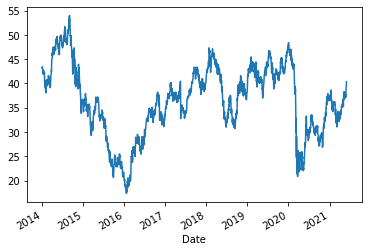

In [125]:
ewz['Close'].plot()

### 4.4.5 Commodities

In [126]:
# Soja

search_results =  investpy.search_quotes(text = 'soy',
                                         products = ['commodities'],
                                         countries = ['brazil'],
                                         n_results = 50)

for search_result in search_results:
    print(search_result)

{"id_": 964523, "name": "US Soybeans Futures", "symbol": "SJCc1", "country": null, "tag": "/commodities/us-soybeans?cid=964523", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [127]:
soja_br = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date = '01/06/2022')

In [128]:
soja_br.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2014-01-02,28.05,28.05,28.05,28.00,2,-2.95
2014-01-03,27.94,27.94,27.94,28.03,215,0.11
2014-01-06,28.20,28.20,28.20,28.15,2,0.43
2014-01-07,28.14,28.20,28.14,28.13,22,-0.07
2014-01-08,27.98,27.98,27.98,27.98,0,-0.53


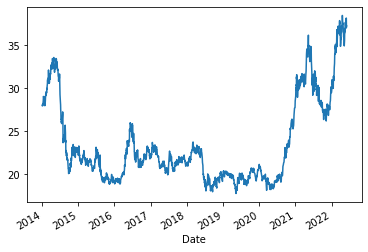

In [129]:
soja_br['Close'].plot()

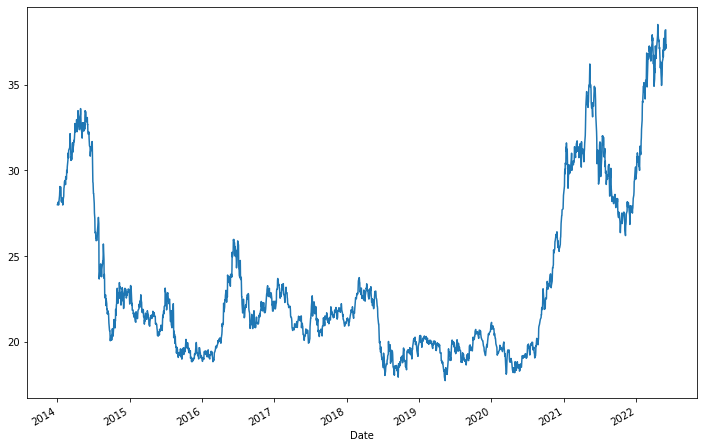

In [134]:
soja_br['Close'].plot(figsize = (12,8))

In [135]:
# milho

search_results =  investpy.search_quotes(text = 'corn',
                                         products = ['commodities'],
                                         countries = ['brazil'],
                                         n_results = 50)

for search_result in search_results:
    print(search_result)

{"id_": 1181089, "name": "US Corn Futures", "symbol": "CCMc3", "country": null, "tag": "/commodities/us-corn?cid=1181089", "pair_type": "commodities", "exchange": "BM&FBovespa"}
{"id_": 1181088, "name": "US Corn Futures", "symbol": "CCMc2", "country": null, "tag": "/commodities/us-corn?cid=1181088", "pair_type": "commodities", "exchange": "BM&FBovespa"}
{"id_": 964522, "name": "US Corn Futures", "symbol": "CCMc1", "country": null, "tag": "/commodities/us-corn?cid=964522", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [137]:
# selecionando o terceiro contrato 

for search_result in search_results[2:3]:
    print(search_result)

{"id_": 964522, "name": "US Corn Futures", "symbol": "CCMc1", "country": null, "tag": "/commodities/us-corn?cid=964522", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [138]:
milho_br = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date = '01/06/2022')

In [140]:
milho_br.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2014-01-02,27.25,27.35,27.02,27.29,582,0.11
2014-01-03,27.30,27.75,27.30,27.71,668,1.54
2014-01-06,27.72,28.37,27.70,28.20,1225,1.77
2014-01-07,28.16,28.27,27.60,27.67,809,-1.88
2014-01-08,27.65,27.79,27.25,27.35,832,-1.16


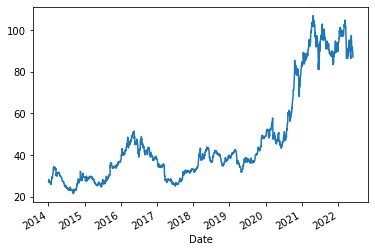

In [141]:
milho_br['Close'].plot()

In [142]:
# boi gordo

search_results =  investpy.search_quotes(text = 'cattle',
                                         products = ['commodities'],
                                         countries = ['brazil'],
                                         n_results = 50)

for search_result in search_results:
    print(search_result)

{"id_": 964528, "name": "Live Cattle Futures", "symbol": "BGIc1", "country": null, "tag": "/commodities/live-cattle?cid=964528", "pair_type": "commodities", "exchange": "BM&FBovespa"}
{"id_": 1181094, "name": "Live Cattle Futures", "symbol": "BGIc2", "country": null, "tag": "/commodities/live-cattle?cid=1181094", "pair_type": "commodities", "exchange": "BM&FBovespa"}
{"id_": 1181095, "name": "Live Cattle Futures", "symbol": "BGIc3", "country": null, "tag": "/commodities/live-cattle?cid=1181095", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [143]:
# selecionando o primeiro contrato

for search_result in search_results[0:1]:
    print(search_result)

{"id_": 964528, "name": "Live Cattle Futures", "symbol": "BGIc1", "country": null, "tag": "/commodities/live-cattle?cid=964528", "pair_type": "commodities", "exchange": "BM&FBovespa"}


In [144]:
boi_gordo_br = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date = '01/06/2022')

In [145]:
boi_gordo_br.head()

,Open,High,Low,Close,Volume,Change Pct
Date,,,,,,
2014-01-02,112.41,113.10,112.41,112.91,1050,-1.41
2014-01-03,112.91,113.38,112.80,113.19,1223,0.25
2014-01-06,113.20,113.75,113.20,113.60,1497,0.36
2014-01-07,113.57,113.57,112.91,112.94,2005,-0.58
2014-01-08,112.92,113.35,112.70,112.80,1578,-0.12


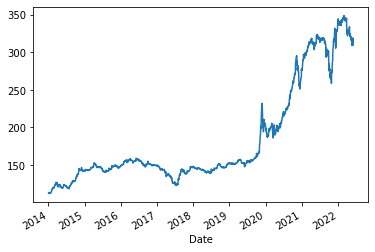

In [147]:
boi_gordo_br['Close'].plot()


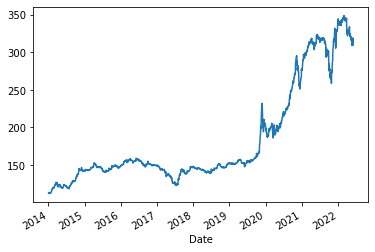

In [148]:
boi_gordo_br.Close.plot()

Algumas commodities internacionais, como o lumber

In [149]:
# lumber é a madeira utilizada para construção cívil 


search_results =  investpy.search_quotes(text = 'lumber',
                                         products = ['commodities'],
                                         countries = ['united states'],
                                         n_results = 50)

for search_result in search_results:
    print(search_result)

{"id_": 959198, "name": "Lumber Futures", "symbol": "LBc1", "country": null, "tag": "/commodities/lumber", "pair_type": "commodities", "exchange": "CME"}
{"id_": 1178209, "name": "Lumber Futures", "symbol": "LBc2", "country": null, "tag": "/commodities/lumber?cid=1178209", "pair_type": "commodities", "exchange": "CME"}
{"id_": 1178210, "name": "Lumber Futures", "symbol": "LBc3", "country": null, "tag": "/commodities/lumber?cid=1178210", "pair_type": "commodities", "exchange": "CME"}


In [150]:
# Usando apenas o primeiro contrato

for search_result in search_results[:1]:
    print(search_result)

{"id_": 959198, "name": "Lumber Futures", "symbol": "LBc1", "country": null, "tag": "/commodities/lumber", "pair_type": "commodities", "exchange": "CME"}


In [151]:

lumber = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date = '01/06/2022')

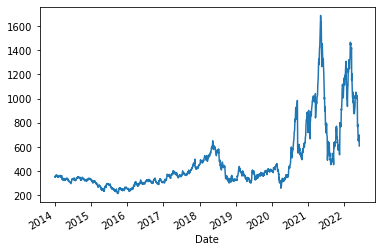

In [152]:
# plotando os preçõs de fechamento

lumber.Close.plot()

In [153]:
# Urânio

search_results =  investpy.search_quotes(text = 'uranium',
                                         products = ['commodities'],
                                         countries = ['united states'],
                                         n_results = 50)

for search_result in search_results:
    print(search_result)

{"id_": 961731, "name": "Uranium Futures", "symbol": "UXXc2", "country": null, "tag": "/commodities/uranium-futures", "pair_type": "commodities", "exchange": "CME"}
{"id_": 1181085, "name": "Uranium Futures", "symbol": "UXXc3", "country": null, "tag": "/commodities/uranium-futures?cid=1181085", "pair_type": "commodities", "exchange": "CME"}


In [154]:
uranium = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date = '01/06/2022')

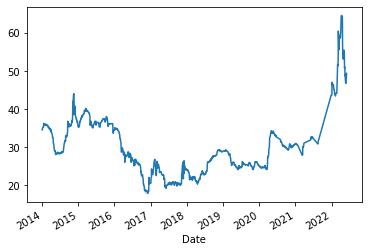

In [156]:
uranium.Close.plot()

### 4.4.6 Criptomoedas


In [158]:
bitcoin = investpy.get_crypto_historical_data(crypto = 'bitcoin',
                                               from_date = '01/01/2014',
                                               to_date = '01/06/2022')

In [159]:
bitcoin.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2014-01-01,805.9,829.9,771.0,815.9,10757,USD
2014-01-02,815.9,886.2,810.5,856.9,12812,USD
2014-01-03,856.9,888.2,839.4,884.3,9709,USD
2014-01-04,884.3,932.2,848.3,924.7,14239,USD
2014-01-05,924.7,1029.9,911.4,1014.7,21374,USD


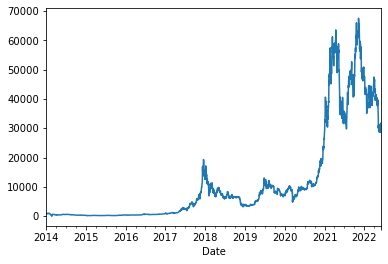

In [160]:
bitcoin.Close.plot();

In [161]:
dogecoin = investpy.get_crypto_historical_data(crypto = 'dogecoin',
                                               from_date = '01/01/2014',
                                               to_date = '01/06/2022')

In [162]:
dogecoin.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2017-06-03,0.002803,0.003398,0.002655,0.003213,4369225,USD
2017-06-04,0.003213,0.003770,0.002544,0.003770,5963160,USD
2017-06-05,0.003770,0.003825,0.002923,0.003718,4823315,USD
2017-06-06,0.003718,0.003718,0.003152,0.003617,2114105,USD
2017-06-07,0.003617,0.003950,0.003132,0.003250,1371475,USD


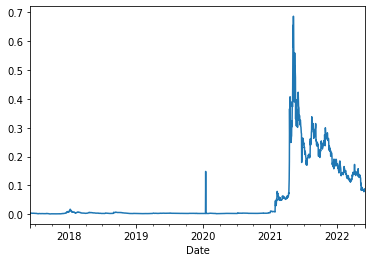

In [164]:
dogecoin['Close'].plot()

In [165]:
ethereum = investpy.get_crypto_historical_data(crypto = 'ethereum',
                                               from_date = '01/01/2014',
                                               to_date = '01/06/2022')

In [166]:
ethereum.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2016-03-10,11.20,11.85,11.07,11.75,4,USD
2016-03-11,11.75,11.95,11.75,11.95,179,USD
2016-03-12,11.95,13.45,11.95,12.92,833,USD
2016-03-13,12.92,15.07,12.92,15.07,1295,USD
2016-03-14,15.07,15.07,11.40,12.50,92183,USD


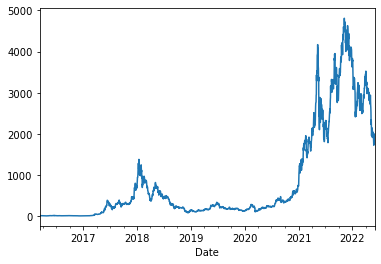

In [168]:
ethereum.Close.plot()

### 4.4.7 Tesouro Direto

In [169]:
# descobrir qual tickt's do tesouro direto 
# ver no site https://www.investing.com/

search_results =  investpy.search_quotes(text = 'tesouro',  
                                         products = ['bonds'], # titulos de renda fixa
                                         countries = ['brazil'],
                                         n_results = 50)

for search_result in search_results:
    print(search_result)

{"id_": 1089868, "name": "Tesouro Selic LFT 0 01-Mar-2023", "symbol": "LFT030123=RRPS", "country": "brazil", "tag": "/rates-bonds/lft-0-01-mar-2023", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1089892, "name": "Tesouro IPCA + NTNB 6 15-Mar-2023", "symbol": "NTB031523=", "country": "brazil", "tag": "/rates-bonds/ntnb-6-15-mar-2023", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1089869, "name": "Tesouro Selic LFT 0 01-Mar-2024", "symbol": "LFT030124=ANDS", "country": "brazil", "tag": "/rates-bonds/lft-0-01-mar-2024", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1172586, "name": "Tesouro Selic Vencimento em 01/03/2027", "symbol": "LFT030127=ANDS", "country": "brazil", "tag": "/rates-bonds/brstnclf1rg5", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 1094220, "name": "Tesouro Prefixado LTN 0 01-Jan-2023", "symbol": "LTN010123=RRPS", "country": "brazil", "tag": "/rates-bonds/ltn-0-01-jan-2023", "pair_type": "bonds", "exchange": "OTC Bonds"}
{"id_": 10

In [170]:
# fazendo a pesquisa pelo indice 6

for search_result in search_results[6:7]:
    print(search_result)

{"id_": 1089897, "name": "Tesouro IPCA + NTNB 6 15-May-2045", "symbol": "NTB051545=", "country": "brazil", "tag": "/rates-bonds/ntnb-6-15-may-2045", "pair_type": "bonds", "exchange": "OTC Bonds"}


In [171]:
ipca_2045 = search_result.retrieve_historical_data(from_date = '01/01/2014', to_date = '01/06/2022')

In [172]:
ipca_2045.head()

,Open,High,Low,Close,Change Pct
Date,,,,,
2016-07-04,2865.733,2865.733,2865.733,2865.733,0.02
2016-07-05,2840.310,2840.310,2840.310,2840.310,-0.89
2016-07-06,2833.601,2833.601,2833.601,2833.601,-0.24
2016-07-07,2834.282,2834.282,2834.282,2834.282,0.02
2016-07-08,2860.950,2860.950,2860.950,2860.950,0.94


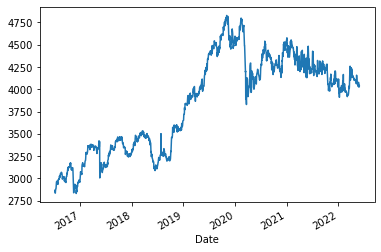

In [174]:
ipca_2045.Close.plot()